# Pré-Processamento de Dados do Arquivo Teams2

O pré-processamento dos dados é uma etapa fundamental na construção de modelos preditivos eficazes. Ele garante que os dados estejam em uma forma adequada para análise, eliminando inconsistências, ajustando escalas e transformando variáveis para que possam ser utilizadas de forma eficiente pelos algoritmos de aprendizado de máquina.

Nesta seção, será realizado uma série de procedimentos para preparar o dataset para as etapas de modelagem subsequentes. As etapas incluem o tratamento de valores ausentes, a remoção de outliers, a codificação de variáveis categóricas e a normalização de variáveis numéricas. Essas ações são essenciais para melhorar a qualidade dos dados e, consequentemente, a performance do modelo preditivo.

Cada uma dessas etapas será detalhada a seguir, explicando as técnicas utilizadas e os motivos por trás de cada decisão tomada.

## Objetivo do Pré-Processamento de Dados

O principal objetivo desta seção é preparar os dados para análises subsequentes, garantindo que eles estejam completos, consistentes e prontos para modelagem. As etapas a seguir abordam o tratamento de valores ausentes, remoção de colunas irrelevantes, tratamento de outliers e transformação de variáveis.

## Como Usar Este Notebook

1. **Configuração do Ambiente**:
   - **Google Colab**: Se estiver usando o Google Colab, faça o upload das tabelas para o Google Drive e monte o drive no notebook.
   - **Localmente**: Se estiver rodando o notebook localmente, baixe as tabelas e coloque-as no mesmo diretório do notebook ou ajuste os caminhos dos arquivos conforme necessário.

2. **Instalação de Dependências**:
   - Certifique-se de que todas as bibliotecas necessárias estão instaladas no ambiente de execução. Para garantir isso, você pode utilizar um arquivo de dependências (como `requirements.txt`), ou instalar as bibliotecas manualmente.

3. **Execução do Notebook**:
   - Siga as células de código sequencialmente para garantir que todas as etapas sejam executadas corretamente. Ao final do pré-processamento, os dados estarão prontos para modelagem e análise.

## Etapas do Pré-Processamento

1. **Tratamento de Valores Ausentes**:
   - A identificação de valores ausentes (missing values) é essencial para garantir a integridade dos dados. Nesta etapa, serão identificadas colunas com valores faltantes e os métodos de imputação ou remoção desses valores serão definidos. Dependendo do contexto, os valores ausentes podem ser preenchidos com a média, mediana, ou descartados.
   
2. **Exclusão de Colunas**:
   - Algumas colunas podem não ser relevantes para a análise ou podem conter muitos valores ausentes. Neste caso, a exclusão dessas colunas se torna uma opção importante para garantir a qualidade do dataset e evitar viés nas análises.

3. **Identificação de Outliers por Gráficos**:
   - A visualização de dados por meio de gráficos, como boxplots, permite identificar a presença de outliers de forma visual. Isso ajuda a entender a distribuição das variáveis e identificar valores que se desviam significativamente do padrão esperado.

4. **Identificação de Outliers Usando o IQR**:
   - O método do intervalo interquartil (IQR) será utilizado para identificar outliers de maneira sistemática. Valores que estejam além de 1.5 vezes o IQR, abaixo do primeiro quartil ou acima do terceiro quartil, serão considerados outliers e tratados adequadamente.

5. **Tratamento de Outliers por Winsorização**:
   - Em vez de excluir outliers, que podem conter informações valiosas, utilizaremos a técnica de **winsorização**. Ela limita os valores extremos dentro de um intervalo aceitável, substituindo-os por valores próximos ao limite superior ou inferior da distribuição, preservando assim a integridade do dataset sem remover dados.

6. **Codificação de Variáveis Categóricas**:
   - As variáveis categóricas, como o nome dos times ou outras características qualitativas, serão transformadas em uma forma numérica para que possam ser utilizadas por algoritmos de aprendizado de máquina. A técnica de **One-Hot Encoding** ou **Label Encoding** será utilizada para esse processo, dependendo do número de categorias e da necessidade do modelo.

7. **Normalização dos Dados**:
   - Para garantir que todas as variáveis numéricas estejam na mesma escala, aplicaremos a normalização ou padronização dos dados. Isso é particularmente importante para algoritmos que são sensíveis à escala das variáveis, como métodos baseados em distância (KNN, SVM, etc.). As técnicas de **MinMaxScaler** ou **StandardScaler** serão aplicadas conforme a necessidade da modelagem.

## Resumo das Etapas

Após o pré-processamento, os dados estarão limpos e prontos para modelagem. O tratamento de valores ausentes, a remoção ou ajuste de outliers e a transformação de variáveis categóricas garantem que os dados estejam em uma condição ideal para algoritmos de aprendizado de máquina. A normalização das variáveis numéricas assegura que as variáveis estejam na mesma escala, o que é fundamental para melhorar o desempenho dos modelos preditivos.


# Dependências
Para rodar o notebook de forma local, é recomendado que inicie uma venv (ambiente virtual) e instale as dependências.

Se estiver utilizando o Google Colab, pule esta etapa.


In [1]:
# Instala as dependências
!pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


# Importando bibliotecas

Aqui é importado as dependências necessárias para a executação do projeto.

In [2]:

import pandas as pd #para ler, visualizar e printar infos do df
import matplotlib.pyplot as plt #para construir e customizar gráficos
import seaborn as sns #para visualizar uns gráficos
import numpy as np #numpy porque é sempre bom importar numpy
import math #para executar operações matemáticas
from scipy import stats #para executar testes estatísticos
from scipy.stats.mstats import winsorize #para realizar a winsorização
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder #para realizar o pré-processamento de dados

# Carregando o dataset

Feita a importação do arquivo para leitura dos dados.

Na leitura de dados vamos conseguir carregar os dados para depois serem análisados

* O arquivo CSV contendo as estatísticas das equipes é lido e armazenado na variável dados
Depois que executar esse código vamos conseguir ler o arquivo e 'armazenar' na variável.

In [3]:
dados = pd.read_csv('../../notebooks/data/teams2_nao_tratado.csv')
dados

# Quando executado, lê o arquivo e 'armazena' na variável "dados"

,team_name,common_name,season,country,average_attendance_overall,average_attendance_home,average_attendance_away,minutes_per_goal_scored_overall,minutes_per_goal_scored_home,minutes_per_goal_scored_away,...,btts_2h_away,btts_2h_percentage_overall,btts_2h_percentage_home,btts_2h_percentage_away,clean_sheets_2h_overall,clean_sheets_2h_home,clean_sheets_2h_away,failed_to_score_2h_overall,failed_to_score_2h_home,failed_to_score_2h_away
0,EC Vitória,Vitória,2024,Brazil,7354,0,7354,75,60,120,...,2,60,67,50,3,1,2,4,2,2
1,CR Flamengo,Flamengo,2024,Brazil,56929,56929,0,51,60,45,...,2,44,50,40,4,1,3,2,1,1
2,Cruzeiro EC,Cruzeiro,2024,Brazil,0,0,0,68,36,225,...,0,33,75,0,5,1,4,3,0,3
3,Botafogo FR,Botafogo,2024,Brazil,0,0,0,53,50,56,...,1,40,60,20,6,2,4,2,1,1
4,Grêmio FB Porto Alegrense,Grêmio,2024,Brazil,36066,0,36066,120,90,180,...,1,13,0,25,5,2,3,5,3,2
5,Fluminense FC,Fluminense,2024,Brazil,23080,0,23080,90,56,225,...,0,30,60,0,0,0,0,7,2,5
6,São Paulo FC,São Paulo,2024,Brazil,33534,33534,0,64,90,50,...,2,30,20,40,6,3,3,4,2,2
7,SE Palmeiras,Palmeiras,2024,Brazil,0,0,0,74,180,50,...,1,11,0,20,7,3,4,5,3,2
8,CA Mineiro,Atlético Mineiro,2024,Brazil,0,0,0,58,72,50,...,2,33,25,40,4,1,3,5,3,2
9,CA Paranaense,Atlético PR,2024,Brazil,31192,31192,0,64,45,113,...,1,20,20,20,7,4,3,3,1,2


## 1.1 Missing Values

No processo de pré-processamento de dados, uma das primeiras etapas envolve a verificação e o tratamento de valores ausentes, conhecidos como **missing values**. Valores ausentes podem surgir por diversos motivos e, se não forem tratados, podem comprometer a qualidade das análises e modelos preditivos. Entretanto, ao inspecionar o dataset utilizado neste projeto, foi constatado que ele não contém valores nulos ou errados.

Como não foram encontrados valores nulos ou inconsistentes no dataset, não foi necessário aplicar técnicas de imputação ou remoção de dados. Este resultado é ideal, pois garante que todos os dados disponíveis podem ser utilizados diretamente nas análises e na construção dos modelos preditivos, sem a necessidade de intervenção adicional.


## 1.2 Exclusão de colunas

Como parte do processo de pré-processamento, é importante identificar e remover colunas que não acrescentam valor significativo à análise ou que podem introduzir ruído nos modelos preditivos. No dataset original, identificamos várias colunas que foram consideradas desnecessárias para os objetivos do projeto, seja por serem redundantes, irrelevantes ou por não fornecerem informações úteis para as previsões.

As colunas a seguir foram identificadas para exclusão com base nos seguintes critérios:
- **Irrelevância para Análise Preditiva**: Colunas como `country`, `average_attendance_overall`, e `season` foram removidas, pois não contribuem diretamente para a análise do desempenho das equipes ou para a previsão de resultados.
- **Dados Redundantes**: Colunas que agregam informações já disponíveis em outras colunas, como `under05_percentage`, que nada mais é que a porcentagem da coluna `under05_count`, foram excluídas para evitar duplicidade.

In [4]:
apagar = [
    "over145_corners_percentage",
    "draw_percentage_overall",
    "goals_conceded_min_71_to_80",
    "goals_conceded_min_61_to_70",
    "goals_conceded_min_51_to_60",
    "goals_conceded_min_31_to_40",
    "goals_conceded_min_21_to_30",
    "goals_conceded_min_11_to_20",
    "goals_conceded_min_0_to_10",
    "goals_scored_min_41_to_50",
    "goals_scored_min_31_to_40",
    "goals_scored_min_21_to_30",
    "goals_scored_min_11_to_20",
    "goals_scored_min_11_to_20",
    "over135_corners_percentage",
    "over125_corners_percentage",
    "over115_corners_percentage",
    "over105_corners_percentage",
    "over95_corners_percentage",
    "over85_corners_percentage",
    "over75_corners_percentage",
    "over65_corners_percentage",
    "losing_at_half_time_percentage_away",
    "losing_at_half_time_percentage_home",
    "losing_at_half_time_percentage",
    "draw_at_half_time_percentage",
    "draw_at_half_time_percentage_away",
    "draw_at_half_time_percentage_home",
    "leading_at_half_time_percentage_away",
    "leading_at_half_time_percentage_home",
    "leading_at_half_time_percentage",
    "btts_half_time_percentage_away",
    "btts_half_time_percentage_home",
    "btts_half_time_percentage",
    "fts_half_time_percentage_away",
    "fts_half_time_percentage_home",
    "fts_half_time_percentage",
    "fts_half_time_away",
    "fts_half_time_home",
    "fts_half_time",
    "clean_sheet_half_time_percentage_away",
    "clean_sheet_half_time_percentage_home",
    "clean_sheet_half_time_percentage",
    "clean_sheet_half_time_away",
    "clean_sheet_half_time_home",
    "first_team_to_score_percentage_away",
    "first_team_to_score_percentage_home",
    "first_team_to_score_percentage",
    "fts_percentage_away",
    "fts_percentage_home",
    "fts_percentage",
    "btts_percentage_away",
    "btts_percentage_home",
    "btts_percentage",
    "clean_sheet_percentage_away",
    "clean_sheet_percentage_home",
    "clean_sheet_percentage",
    "home_advantage_percentage",
    "win_percentage_away",
    "win_percentage_home",
    "win_percentage",
    "over25_half_time_percentage_away",
    "over15_half_time_percentage_away",
    "over05_half_time_percentage_away",
    "over25_half_time_percentage_home",
    "over15_half_time_percentage_home",
    "over05_half_time_percentage_home",
    "over25_half_time_percentage",
    "over15_half_time_percentage",
    "over05_half_time_percentage",
    "over25_count_half_time_away",
    "over15_count_half_time_away",
    "over05_count_half_time_away",
    "over25_count_half_time_home",
    "over15_count_half_time_home",
    "over05_count_half_time_home",
    "over25_count_half_time",
    "over15_count_half_time",
    "over05_count_half_time",
    "under55_percentage_away",
    "under45_percentage_away",
    "under35_percentage_away",
    "under25_percentage_away",
    "under15_percentage_away",
    "under05_percentage_away",
    "under55_percentage_home",
    "under45_percentage_home",
    "under35_percentage_home",
    "under25_percentage_home",
    "under15_percentage_home",
    "under05_percentage_home",
    "under55_percentage",
    "under45_percentage",
    "under35_percentage",
    "under25_percentage",
    "under15_percentage",
    "under05_percentage",
    "over55_percentage_away",
    "over45_percentage_away",
    "over35_percentage_away",
    "over25_percentage_away",
    "over15_percentage_away",
    "over05_percentage_away",
    "over55_percentage_home",
    "over45_percentage_home",
    "over35_percentage_home",
    "over25_percentage_home",
    "over15_percentage_home",
    "over05_percentage_home",
    "over55_percentage",
    "over45_percentage",
    "over35_percentage",
    "over25_percentage",
    "over15_percentage",
    "over05_percentage",
    "under55_count_away",
    "under45_count_away",
    "under35_count_away",
    "under25_count_away",
    "under15_count_away",
    "under05_count_away",
    "under55_count_home",
    "under45_count_home",
    "under35_count_home",
    "under25_count_home",
    "under15_count_home",
    "under05_count_home",
    "under55_count",
    "under45_count",
    "under35_count",
    "under25_count",
    "under15_count",
    "under05_count",
    "over55_count_away",
    "over45_count_away",
    "over35_count_away",
    "over25_count_away",
    "over15_count_away",
    "over05_count_away",
    "over55_count_home",
    "over45_count_home",
    "over35_count_home",
    "over25_count_home",
    "over15_count_home",
    "over05_count_home",
    "over55_count",
    "over45_count",
    "over35_count",
    "over25_count",
    "over15_count",
    "over05_count",
    "btts_half_time_away",
    "btts_half_time_home",
    "btts_half_time",
    "fts_half_time_away",
    "fts_half_time_home",
    "fts_half_time",
    "clean_sheet_half_time_away",
    "clean_sheet_half_time_home",
    "clean_sheet_half_time",
    "goals_conceded_per_match_half_time_away",
    "goals_conceded_per_match_half_time_home",
    "goals_conceded_per_match_half_time",
    "goals_scored_per_match_half_time_away",
    "goals_scored_per_match_half_time_home",
    "goals_scored_per_match_half_time",
    "total_goals_per_match_half_time_away",
    "total_goals_per_match_half_time_home",
    "total_goals_per_match_half_time",
    "points_per_game_half_time_away",
    "points_per_game_half_time_home",
    "points_per_game_half_time",
    "losing_at_half_time_away",
    "losing_at_half_time_home",
    "losing_at_half_time",
    "draw_at_half_time_away",
    "draw_at_half_time_home",
    "draw_at_half_time",
    "leading_at_half_time_away",
    "leading_at_half_time_home",
    "leading_at_half_time",
    "goal_difference_half_time_away",
    "goal_difference_half_time_home",
    "goal_difference_half_time",
    "goals_conceded_half_time_away",
    "goals_conceded_half_time_home",
    "goals_conceded_half_time",
    "goals_scored_half_time_away",
    "goals_scored_half_time_home",
    "goals_scored_half_time",
    "goals_conceded_min_81_to_90",
    "goals_conceded_min_41_to_50",
    "goals_scored_min_81_to_90",
    "goals_scored_min_71_to_80",
    "goals_scored_min_61_to_70",
    "goals_scored_min_51_to_60",
    "country",
    "season",
    "team_name",
    "prediction_risk",
    "loss_percentage_away",
    "draw_percentage_home",
    "draw_percentage_away",
    "loss_percentage_ovearll",
    "loss_percentage_home",
    "btts_2h_percentage_home",
    "btts_2h_percentage_away",
    "btts_2h_percentage_overall",
    "over65_corners_num_overall",
    "over75_corners_num_overall",
    "over85_corners_num_overall",
    "over95_corners_num_overall",
    "over105_corners_num_overall",
    "over115_corners_num_overall",
    "over125_corners_num_overall",
    "over135_corners_num_overall",
    "over145_corners_num_overall",
    "over65_corners_num_home",
    "over75_corners_num_home",
    "over85_corners_num_home",
    "over95_corners_num_home",
    "over105_corners_num_home",
    "over115_corners_num_home",
    "over125_corners_num_home",
    "over135_corners_num_home",
    "over145_corners_num_home",
    "over65_corners_percentage_home",
    "over75_corners_percentage_home",
    "over85_corners_percentage_home",
    "over95_corners_percentage_home",
    "over105_corners_percentage_home",
    "over115_corners_percentage_home",
    "over125_corners_percentage_home",
    "over135_corners_percentage_home",
    "over145_corners_percentage_home",
    "over65_corners_num_away",
    "over75_corners_num_away",
    "over85_corners_num_away",
    "over95_corners_num_away",
    "over105_corners_num_away",
    "over115_corners_num_away",
    "over125_corners_num_away",
    "over135_corners_num_away",
    "over145_corners_num_away",
    "over65_corners_percentage_away",
    "over75_corners_percentage_away",
    "over85_corners_percentage_away",
    "over95_corners_percentage_away",
    "over105_corners_percentage_away",
    "over115_corners_percentage_away",
    "over125_corners_percentage_away",
    "over135_corners_percentage_away",
    "over145_corners_percentage_away",
    "over25_corners_for_overall",
    "over35_corners_for_overall",
    "over45_corners_for_overall",
    "over55_corners_for_overall",
    "over65_corners_for_overall",
    "over75_corners_for_overall",
    "over85_corners_for_overall",
    "over25_corners_for_percentage_overall",
    "over35_corners_for_percentage_overall",
    "over45_corners_for_percentage_overall",
    "over55_corners_for_percentage_overall",
    "over65_corners_for_percentage_overall",
    "over75_corners_for_percentage_overall",
    "over85_corners_for_percentage_overall",
    "over25_corners_for_home",
    "over35_corners_for_home",
    "over45_corners_for_home",
    "over55_corners_for_home",
    "over65_corners_for_home",
    "over75_corners_for_home",
    "over85_corners_for_home",
    "over25_corners_for_percentage_home",
    "over35_corners_for_percentage_home",
    "over45_corners_for_percentage_home",
    "over55_corners_for_percentage_home",
    "over65_corners_for_percentage_home",
    "over75_corners_for_percentage_home",
    "over85_corners_for_percentage_home",
    "over25_corners_for_away",
    "over35_corners_for_away",
    "over45_corners_for_away",
    "over55_corners_for_away",
    "over65_corners_for_away",
    "over75_corners_for_away",
    "over85_corners_for_away",
    "over25_corners_for_percentage_away",
    "over35_corners_for_percentage_away",
    "over45_corners_for_percentage_away",
    "over55_corners_for_percentage_away",
    "over65_corners_for_percentage_away",
    "over75_corners_for_percentage_away",
    "over85_corners_for_percentage_away",
    "over25_corners_against_overall",
    "over35_corners_against_overall",
    "over45_corners_against_overall",
    "over55_corners_against_overall",
    "over65_corners_against_overall",
    "over75_corners_against_overall",
    "over85_corners_against_overall",
    "over25_corners_against_percentage_overall",
    "over35_corners_against_percentage_overall",
    "over45_corners_against_percentage_overall",
    "over55_corners_against_percentage_overall",
    "over65_corners_against_percentage_overall",
    "over75_corners_against_percentage_overall",
    "over85_corners_against_percentage_overall",
    "over25_corners_against_home",
    "over35_corners_against_home",
    "over45_corners_against_home",
    "over55_corners_against_home",
    "over65_corners_against_home",
    "over75_corners_against_home",
    "over85_corners_against_home",
    "over25_corners_against_percentage_home",
    "over35_corners_against_percentage_home",
    "over45_corners_against_percentage_home",
    "over55_corners_against_percentage_home",
    "over65_corners_against_percentage_home",
    "over75_corners_against_percentage_home",
    "over85_corners_against_percentage_home",
    "over25_corners_against_away",
    "over35_corners_against_away",
    "over45_corners_against_away",
    "over55_corners_against_away",
    "over65_corners_against_away",
    "over75_corners_against_away",
    "over85_corners_against_away",
    "over25_corners_against_percentage_away",
    "over35_corners_against_percentage_away",
    "over45_corners_against_percentage_away",
    "over55_corners_against_percentage_away",
    "over65_corners_against_percentage_away",
    "over75_corners_against_percentage_away",
    "over85_corners_against_percentage_away",
    "over05_cards_total_overall",
    "over15_cards_total_overall",
    "over25_cards_total_overall",
    "over35_cards_total_overall",
    "over45_cards_total_overall",
    "over55_cards_total_overall",
    "over65_cards_total_overall",
    "over75_cards_total_overall",
    "over85_cards_total_overall",
    "over05_cards_total_percentage_overall",
    "over15_cards_total_percentage_overall",
    "over25_cards_total_percentage_overall",
    "over35_cards_total_percentage_overall",
    "over45_cards_total_percentage_overall",
    "over55_cards_total_percentage_overall",
    "over65_cards_total_percentage_overall",
    "over75_cards_total_percentage_overall",
    "over85_cards_total_percentage_overall",
    "over05_cards_total_home",
    "over15_cards_total_home",
    "over25_cards_total_home",
    "over35_cards_total_home",
    "over45_cards_total_home",
    "over55_cards_total_home",
    "over65_cards_total_home",
    "over75_cards_total_home",
    "over85_cards_total_home",
    "over05_cards_total_percentage_home",
    "over15_cards_total_percentage_home",
    "over25_cards_total_percentage_home",
    "over35_cards_total_percentage_home",
    "over45_cards_total_percentage_home",
    "over55_cards_total_percentage_home",
    "over65_cards_total_percentage_home",
    "over75_cards_total_percentage_home",
    "over85_cards_total_percentage_home",
    "over05_cards_total_away",
    "over15_cards_total_away",
    "over25_cards_total_away",
    "over35_cards_total_away",
    "over45_cards_total_away",
    "over55_cards_total_away",
    "over65_cards_total_away",
    "over75_cards_total_away",
    "over85_cards_total_away",
    "over05_cards_total_percentage_away",
    "over15_cards_total_percentage_away",
    "over25_cards_total_percentage_away",
    "over35_cards_total_percentage_away",
    "over45_cards_total_percentage_away",
    "over55_cards_total_percentage_away",
    "over65_cards_total_percentage_away",
    "over75_cards_total_percentage_away",
    "over85_cards_total_percentage_away",
    "over05_cards_for_overall",
    "over15_cards_for_overall",
    "over25_cards_for_overall",
    "over35_cards_for_overall",
    "over45_cards_for_overall",
    "over55_cards_for_overall",
    "over65_cards_for_overall",
    "over05_cards_for_percentage_overall",
    "over15_cards_for_percentage_overall",
    "over25_cards_for_percentage_overall",
    "over35_cards_for_percentage_overall",
    "over45_cards_for_percentage_overall",
    "over55_cards_for_percentage_overall",
    "over65_cards_for_percentage_overall",
    "over05_cards_for_home",
    "over15_cards_for_home",
    "over25_cards_for_home",
    "over35_cards_for_home",
    "over45_cards_for_home",
    "over55_cards_for_home",
    "over65_cards_for_home",
    "over05_cards_for_percentage_home",
    "over15_cards_for_percentage_home",
    "over25_cards_for_percentage_home",
    "over35_cards_for_percentage_home",
    "over45_cards_for_percentage_home",
    "over55_cards_for_percentage_home",
    "over65_cards_for_percentage_home",
    "over05_cards_for_away",
    "over15_cards_for_away",
    "over25_cards_for_away",
    "over35_cards_for_away",
    "over45_cards_for_away",
    "over55_cards_for_away",
    "over65_cards_for_away",
    "over05_cards_for_percentage_away",
    "over15_cards_for_percentage_away",
    "over25_cards_for_percentage_away",
    "over35_cards_for_percentage_away",
    "over45_cards_for_percentage_away",
    "over55_cards_for_percentage_away",
    "over65_cards_for_percentage_away",
    "over05_cards_against_overall",
    "over15_cards_against_overall",
    "over25_cards_against_overall",
    "over35_cards_against_overall",
    "over45_cards_against_overall",
    "over55_cards_against_overall",
    "over65_cards_against_overall",
    "over05_cards_against_percentage_overall",
    "over15_cards_against_percentage_overall",
    "over25_cards_against_percentage_overall",
    "over35_cards_against_percentage_overall",
    "over45_cards_against_percentage_overall",
    "over55_cards_against_percentage_overall",
    "over65_cards_against_percentage_overall",
    "over05_cards_against_home",
    "over15_cards_against_home",
    "over25_cards_against_home",
    "over35_cards_against_home",
    "over45_cards_against_home",
    "over55_cards_against_home",
    "over65_cards_against_home",
    "over05_cards_against_percentage_home",
    "over15_cards_against_percentage_home",
    "over25_cards_against_percentage_home",
    "over35_cards_against_percentage_home",
    "over45_cards_against_percentage_home",
    "over55_cards_against_percentage_home",
    "over65_cards_against_percentage_home",
    "over05_cards_against_away",
    "over15_cards_against_away",
    "over25_cards_against_away",
    "over35_cards_against_away",
    "over45_cards_against_away",
    "over55_cards_against_away",
    "over65_cards_against_away",
    "over05_cards_against_percentage_away",
    "over15_cards_against_percentage_away",
    "over25_cards_against_percentage_away",
    "over35_cards_against_percentage_away",
    "over45_cards_against_percentage_away",
    "over55_cards_against_percentage_away",
    "over65_cards_against_percentage_away",
    "firstGoalScoredPercentage_overall",
    "firstGoalScoredPercentage_home",
    "firstGoalScoredPercentage_away",
    "offsides_total_over15_overall",
    "offsides_total_over25_overall",
    "offsides_total_over35_overall",
    "offsides_total_over45_overall",
    "scoredBothHalvesPercentage_overall",
    "scoredBothHalvesPercentage_home",
    "scoredBothHalvesPercentage_away",
    "BTTS_and_win_percentage_overall",
    "BTTS_and_win_percentage_home",
    "BTTS_and_win_percentage_away",
    "BTTS_and_draw_percentage_overall",
    "BTTS_and_draw_percentage_home",
    "BTTS_and_draw_percentage_away",
    "BTTS_and_lose_percentage_overall",
    "BTTS_and_lose_percentage_home",
    "BTTS_and_lose_percentage_away",
    "over05_2hg_matches_overall",
    "over15_2hg_matches_overall",
    "over25_2hg_matches_overall",
    "over05_2hg_percentage_overall",
    "over15_2hg_percentage_overall",
    "over25_2hg_percentage_overall",
    "wins_2h_percentage_overall",
    "wins_2h_percentage_home",
    "wins_2h_percentage_away",
    "average_attendance_home",
    "average_attendance_away", 
    "average_attendance_overall"
]

# Apagando as colunas do DataFrame
dados = dados.drop(columns=apagar, errors='ignore')
dados.head()

,common_name,minutes_per_goal_scored_overall,minutes_per_goal_scored_home,minutes_per_goal_scored_away,minutes_per_goal_conceded_overall,minutes_per_goal_conceded_home,minutes_per_goal_conceded_away,highest_goals_scored_home,highest_goals_scored_away,highest_goals_conceded_home,...,losses_2h_away,btts_2h_overall,btts_2h_home,btts_2h_away,clean_sheets_2h_overall,clean_sheets_2h_home,clean_sheets_2h_away,failed_to_score_2h_overall,failed_to_score_2h_home,failed_to_score_2h_away
0,Vitória,75,60,120,53,49,60,4,1,3,...,2,6,4,2,3,1,2,4,2,2
1,Flamengo,51,60,45,101,90,113,2,6,2,...,0,4,2,2,4,1,3,2,1,1
2,Cruzeiro,68,36,225,81,90,75,3,1,2,...,1,3,3,0,5,1,4,3,0,3
3,Botafogo,53,50,56,100,113,90,5,2,2,...,1,4,3,1,6,2,4,2,1,1
4,Grêmio,120,90,180,72,90,60,2,1,2,...,0,1,0,1,5,2,3,5,3,2


## 1.3 Identificação de Outliers

Essa subseção foi feita a identificação e tratamento de outliers. Outliers são valores que se distanciam significativamente do restante dos dados, podendo distorcer análises e influenciar negativamente o desempenho do modelos preditivos. Dessa forma, é necessário identificar esses valores anômalos para decidir se eles devem ser tratados ou removidos, garantindo que as análises e modelos subsequentes sejam precisos e confiáveis.

Abaixo foi feita a visualização através de boxplots para identificar outliers nas colunas numéricas do dataset. Os boxplots são ferramentas visuais eficazes para detectar outliers, pois mostram a distribuição dos dados e destacam pontos que estão além dos limites esperados.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Columns: 138 entries, common_name to failed_to_score_2h_away
dtypes: float64(42), int64(95), object(1)
memory usage: 21.7+ KB
None
  common_name  minutes_per_goal_scored_overall  minutes_per_goal_scored_home  \
0     Vitória                               75                            60   
1    Flamengo                               51                            60   
2    Cruzeiro                               68                            36   
3    Botafogo                               53                            50   
4      Grêmio                              120                            90   

   minutes_per_goal_scored_away  minutes_per_goal_conceded_overall  \
0                           120                                 53   
1                            45                                101   
2                           225                                 81   
3                            56       

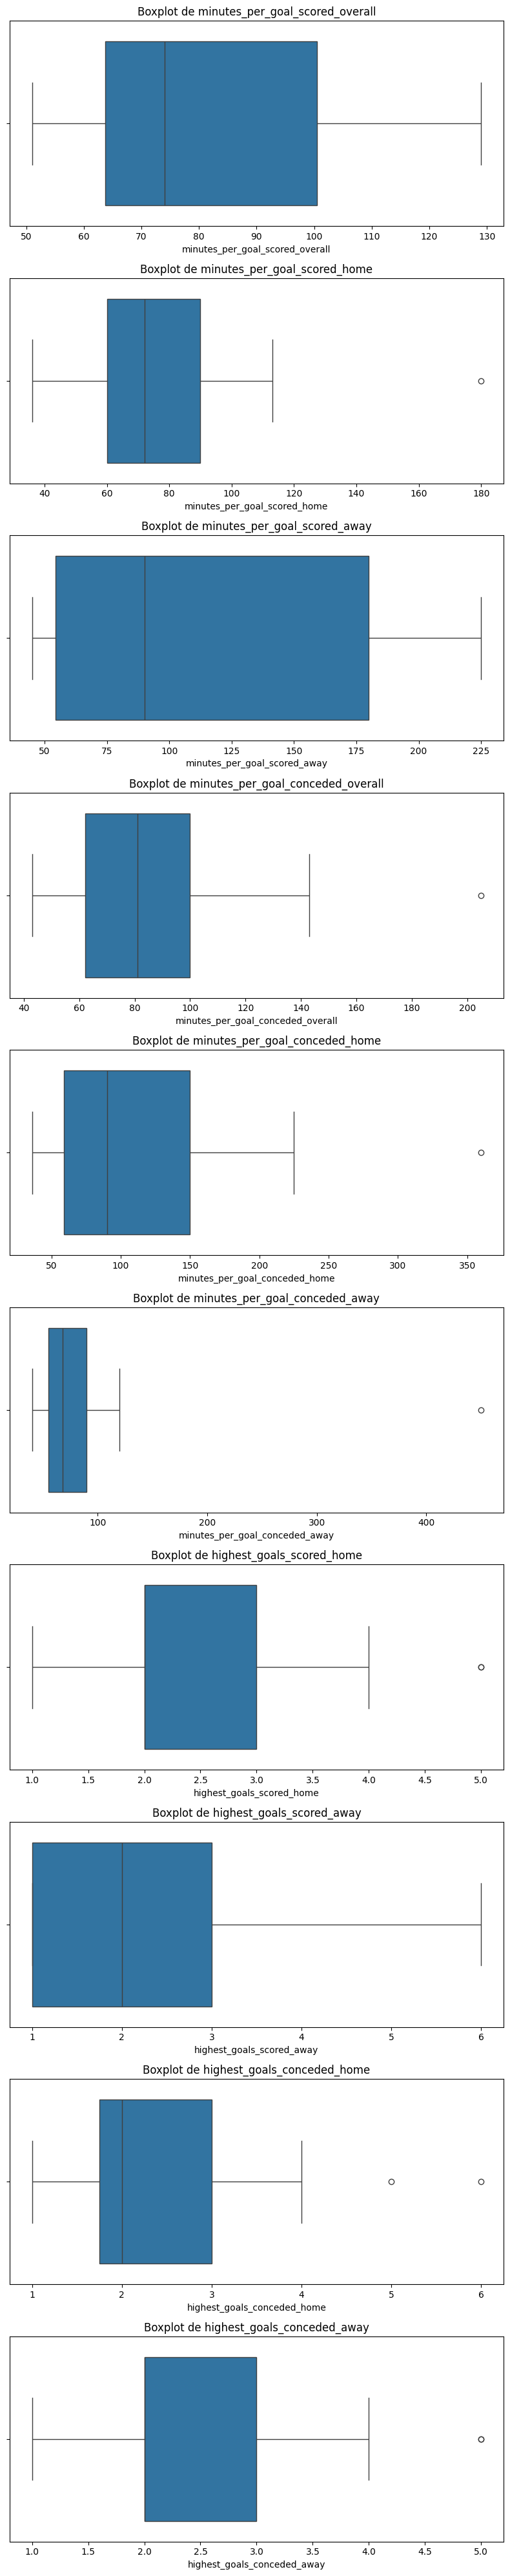

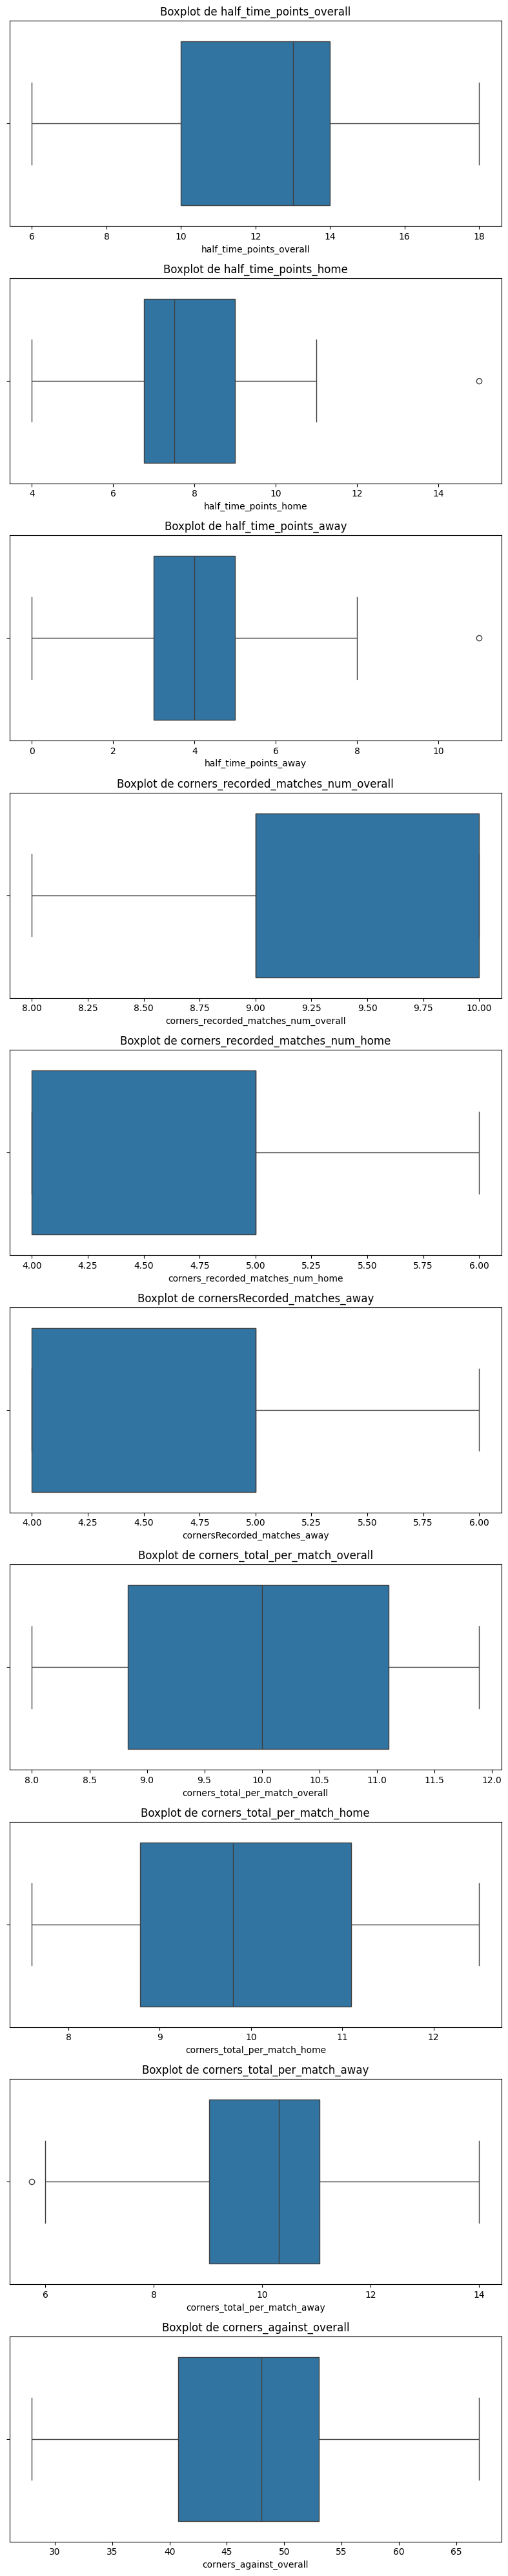

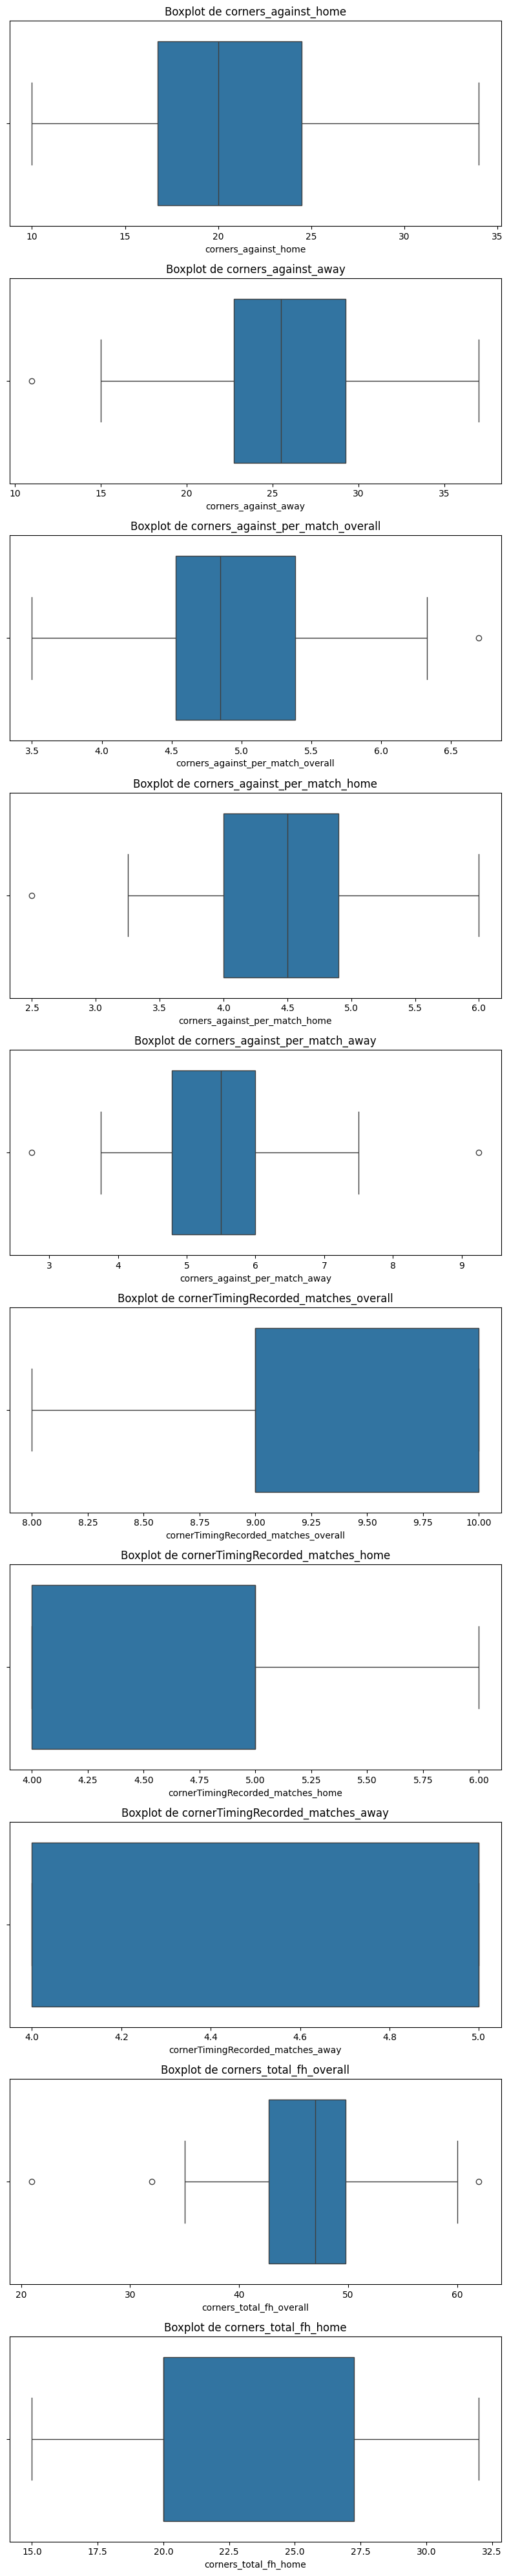

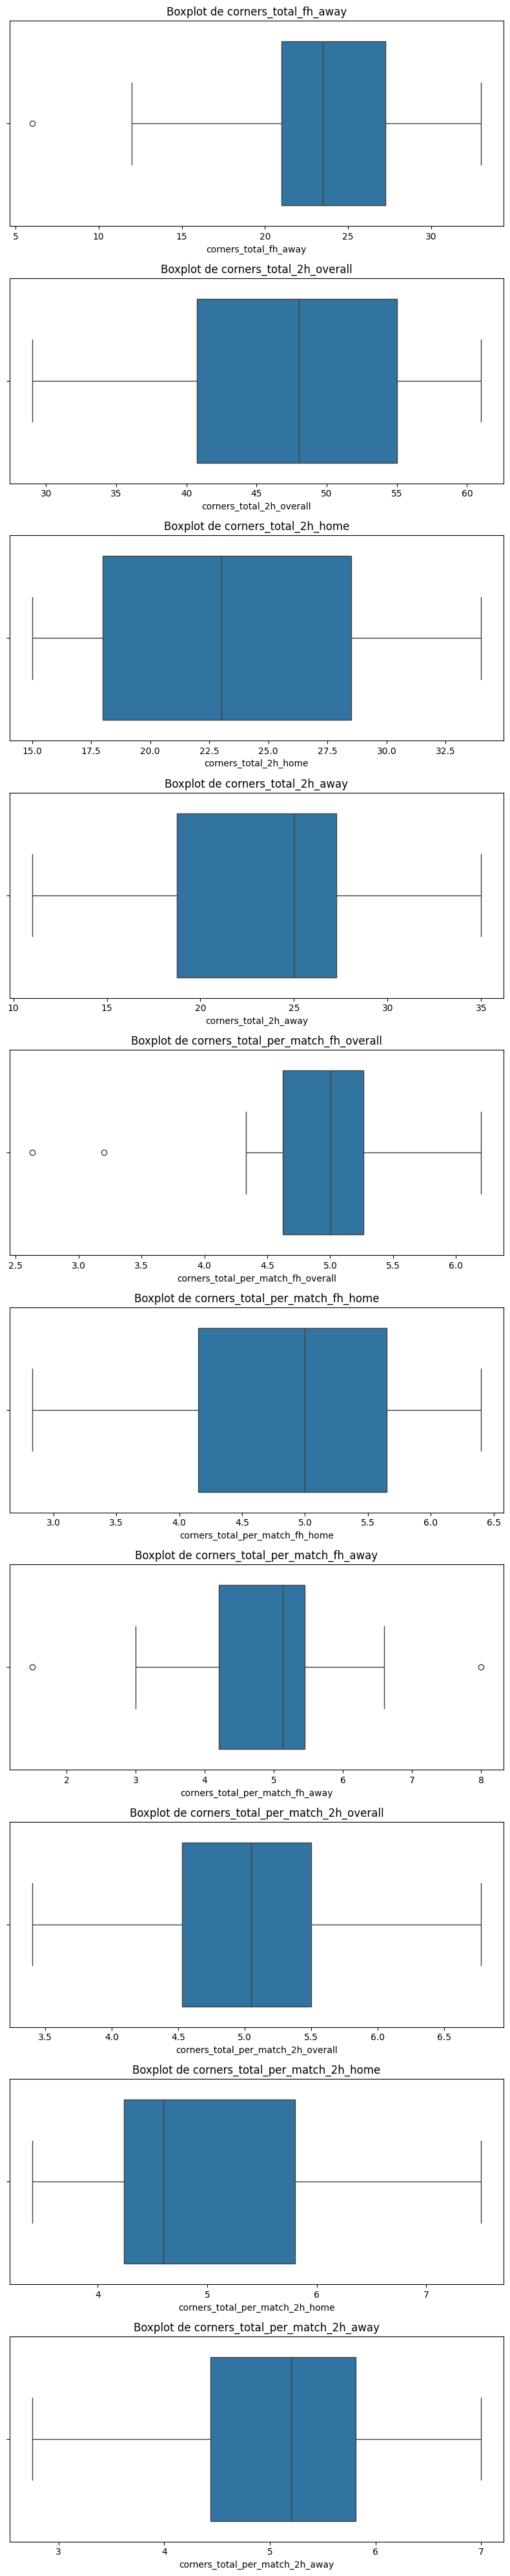

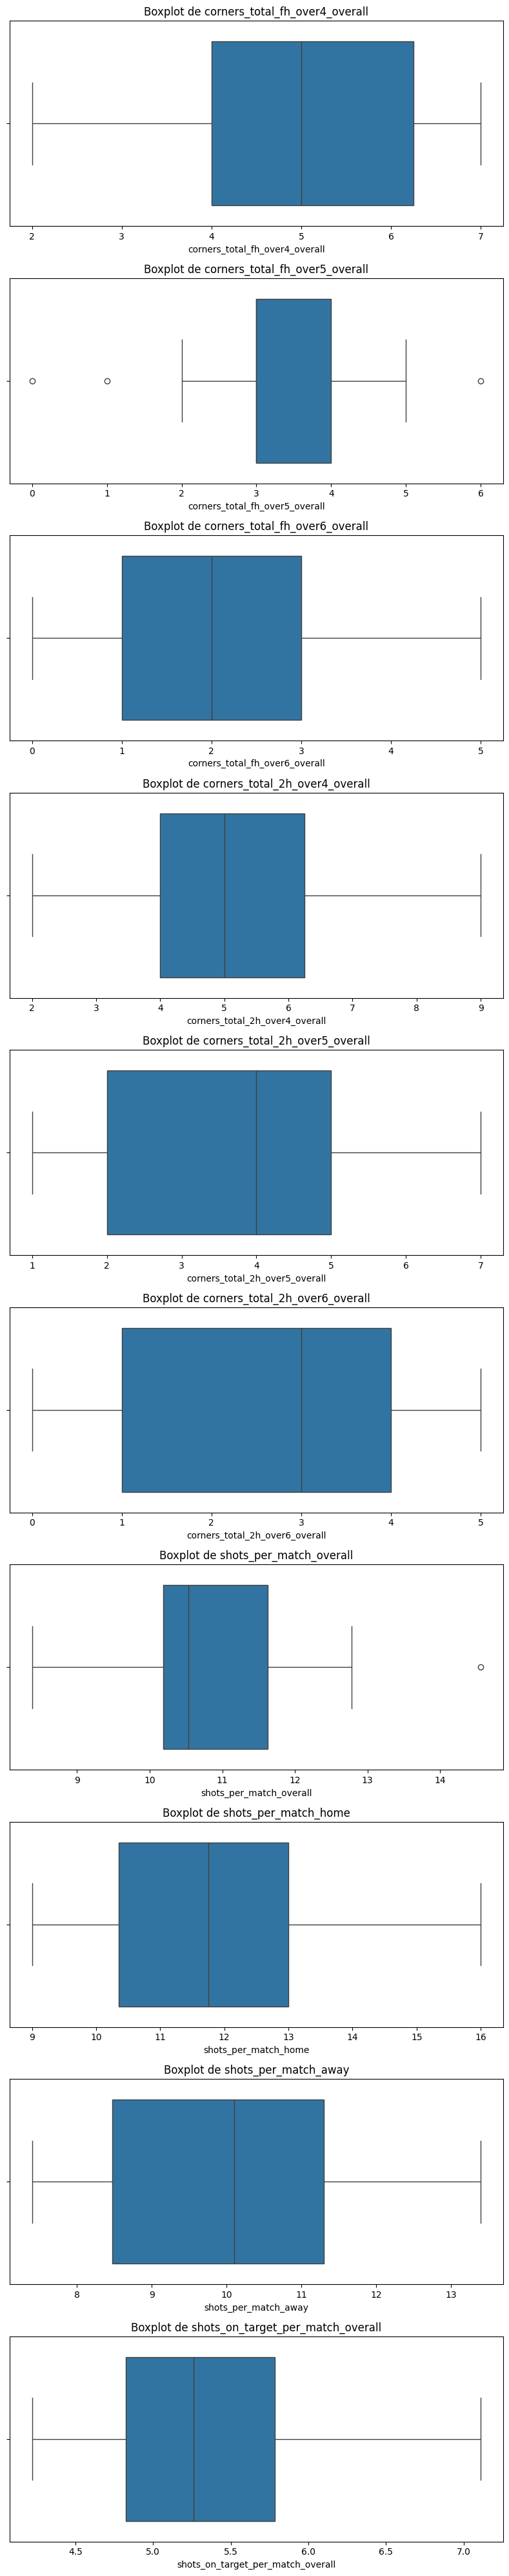

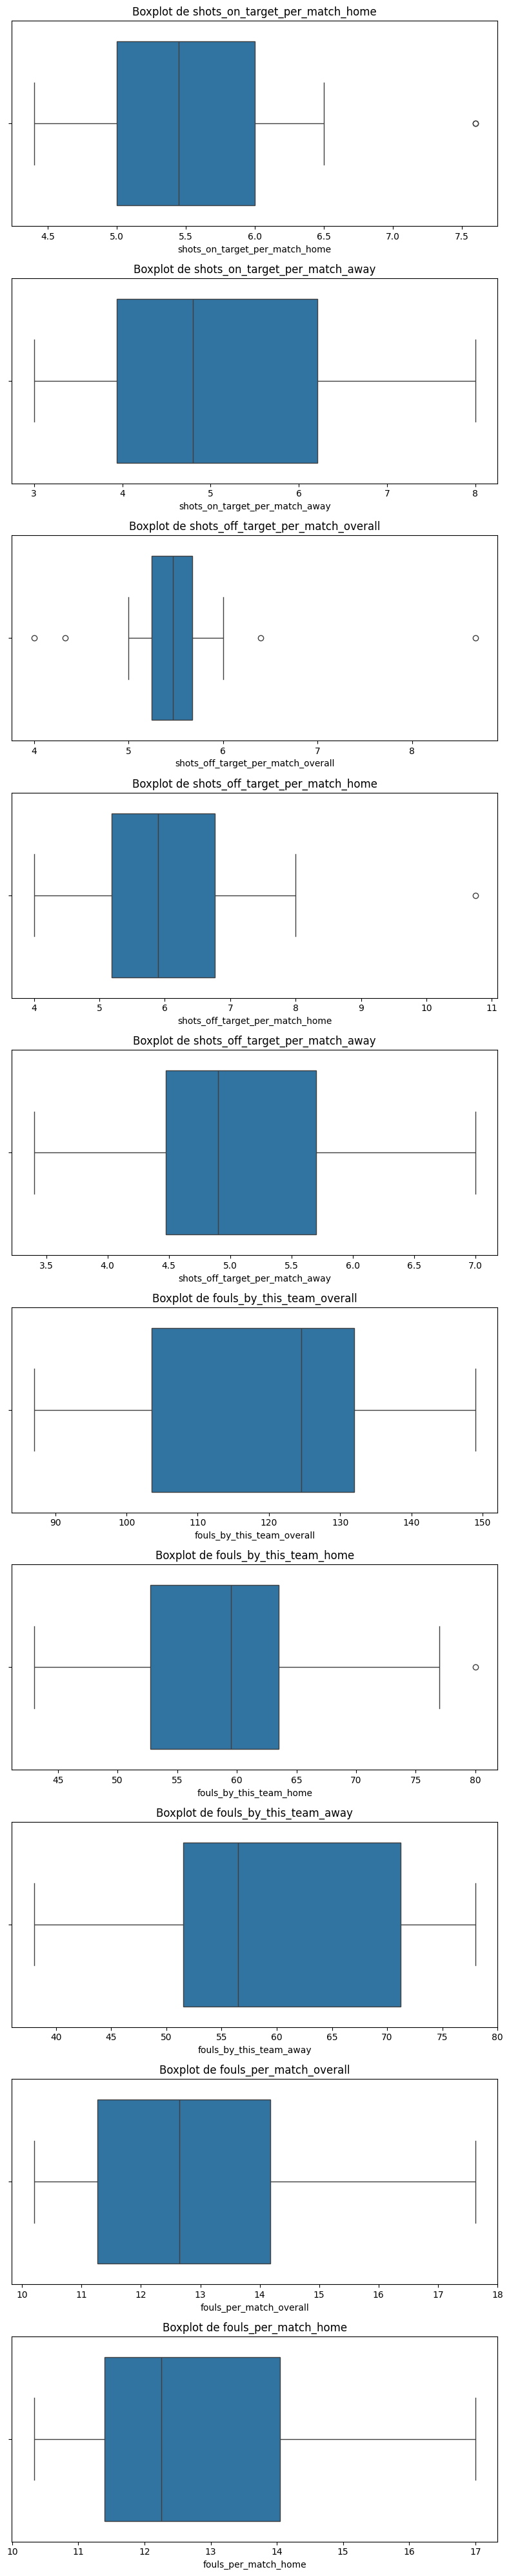

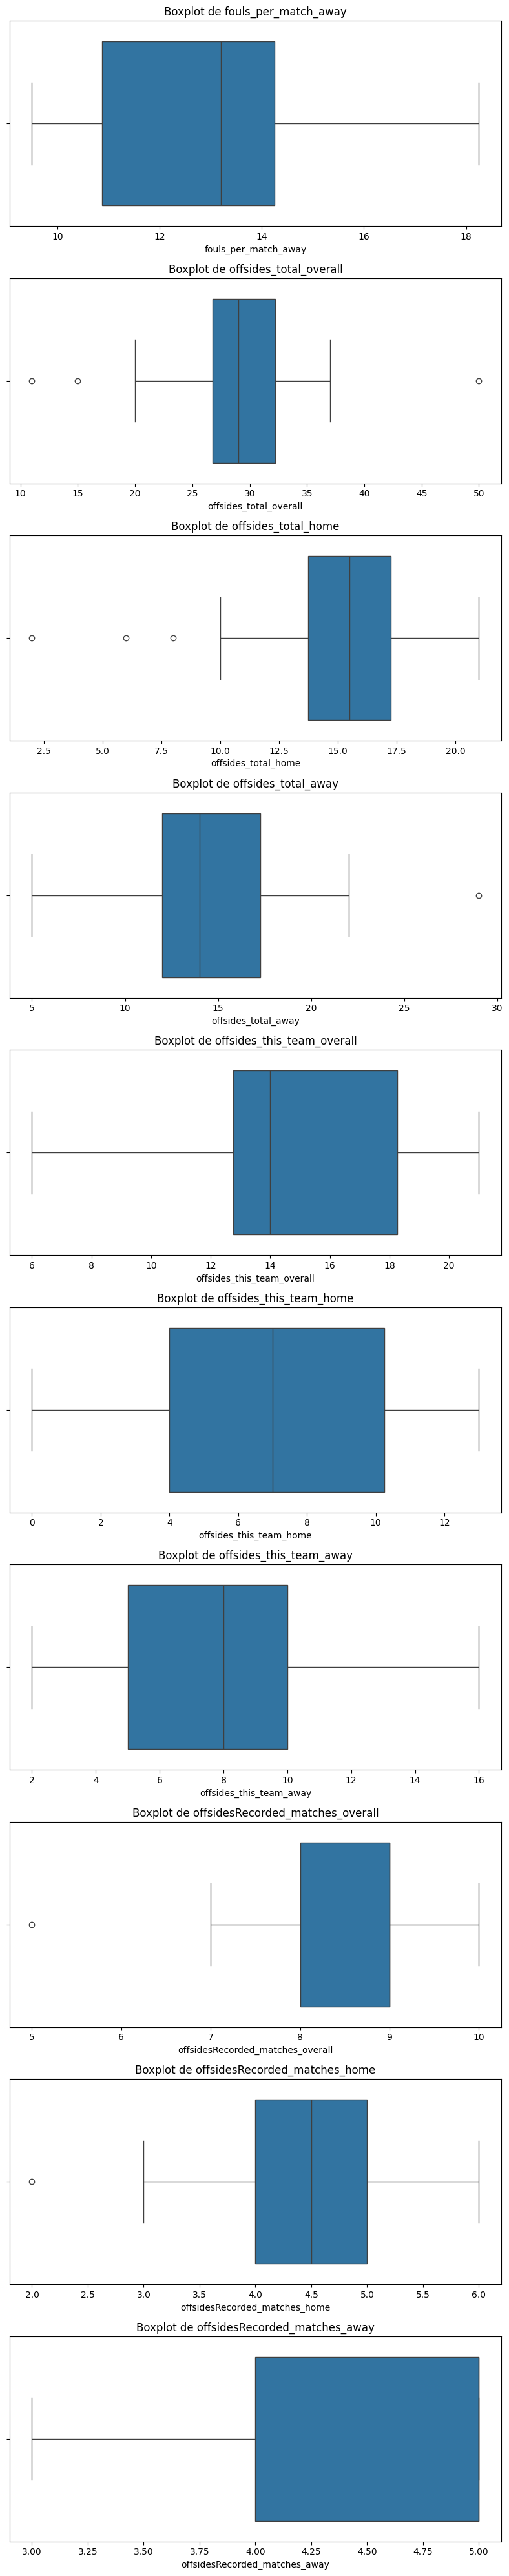

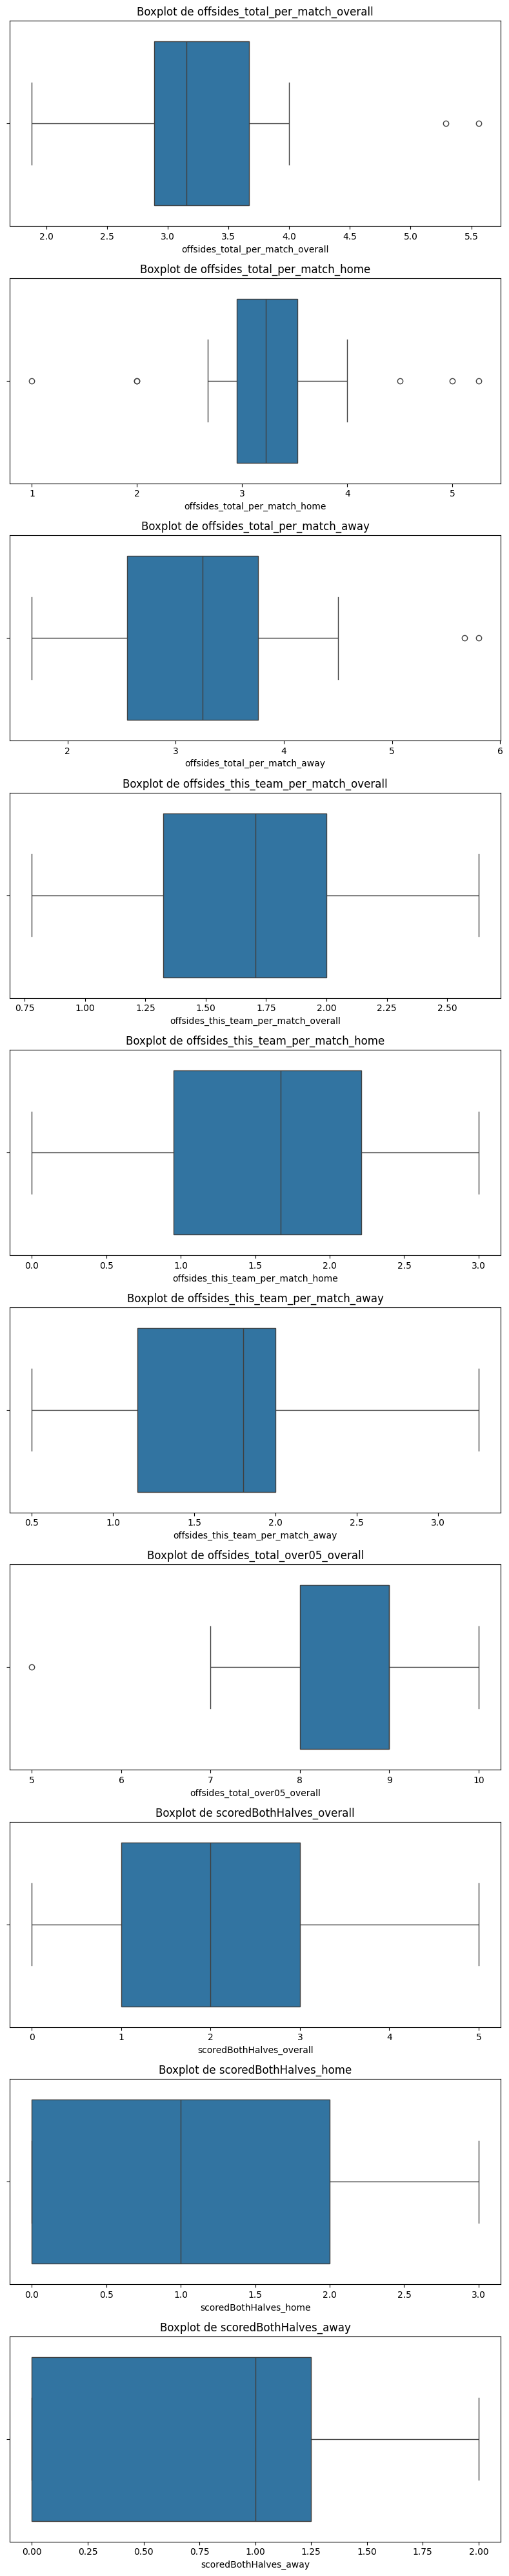

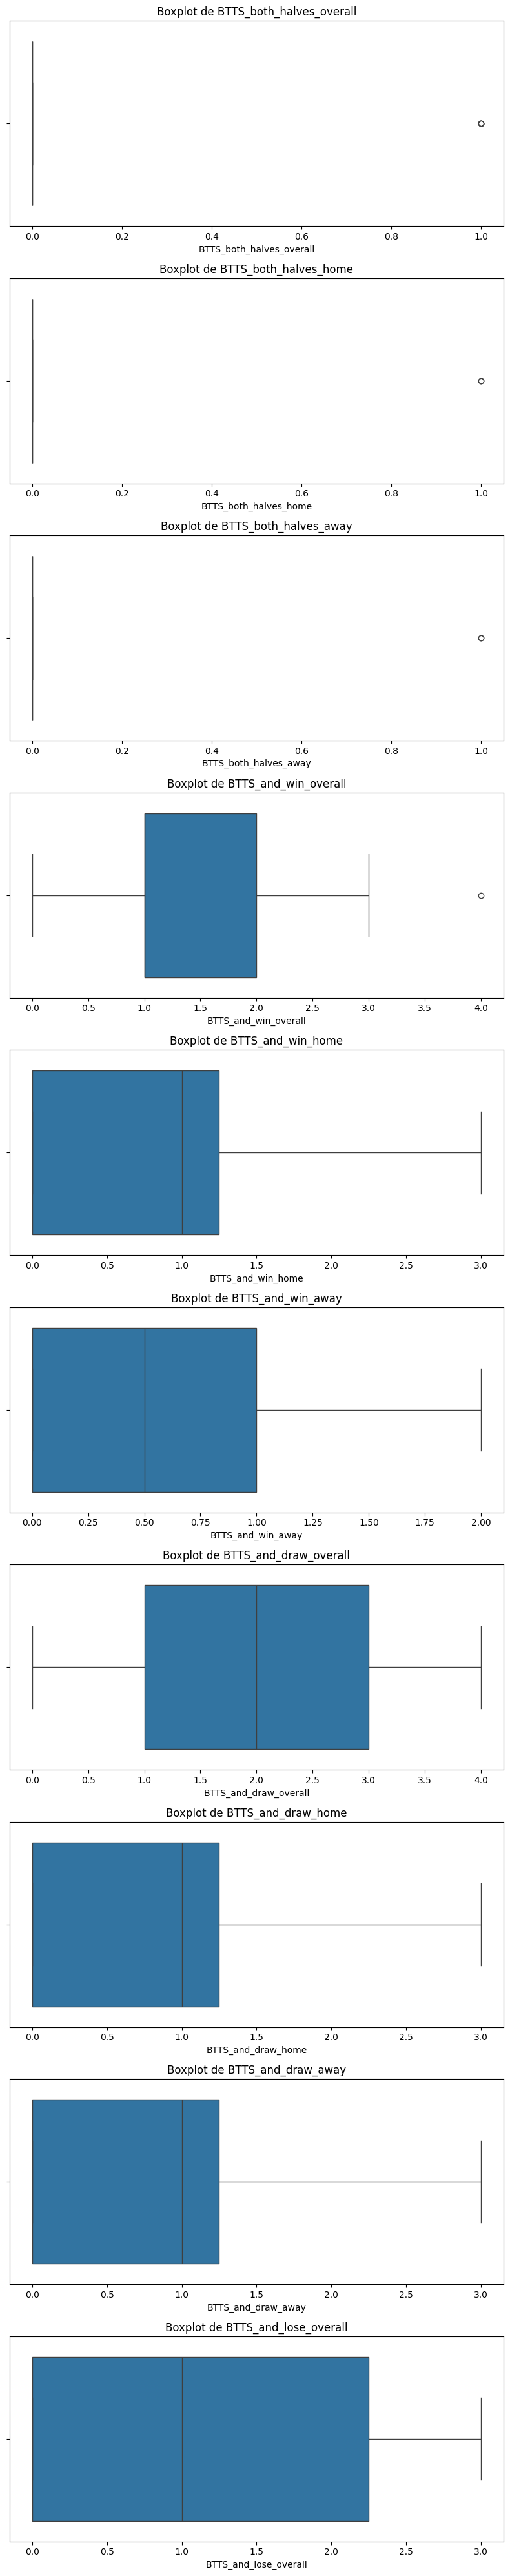

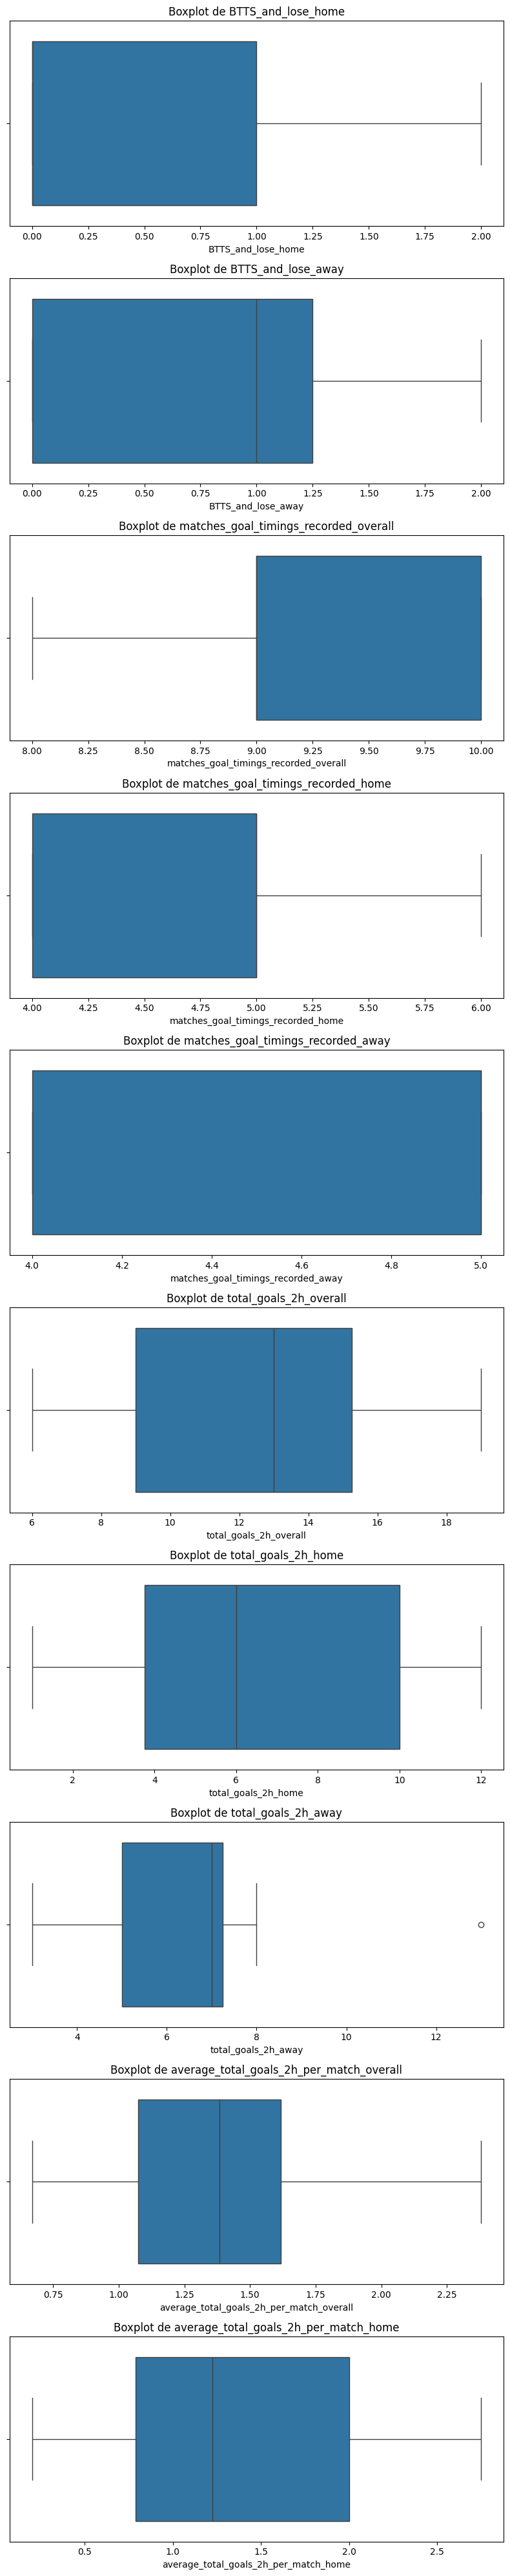

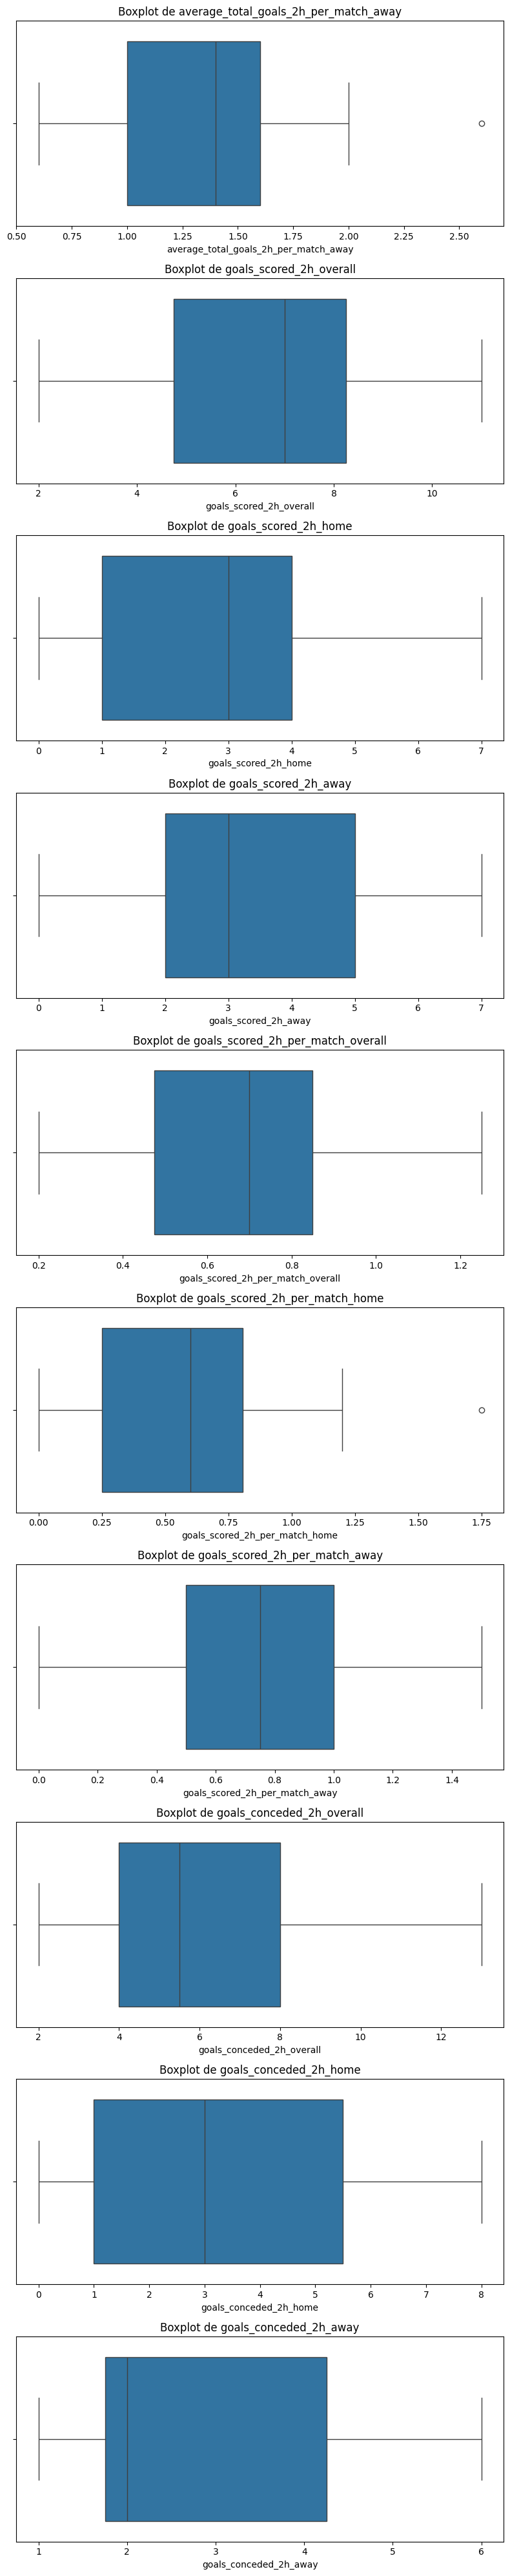

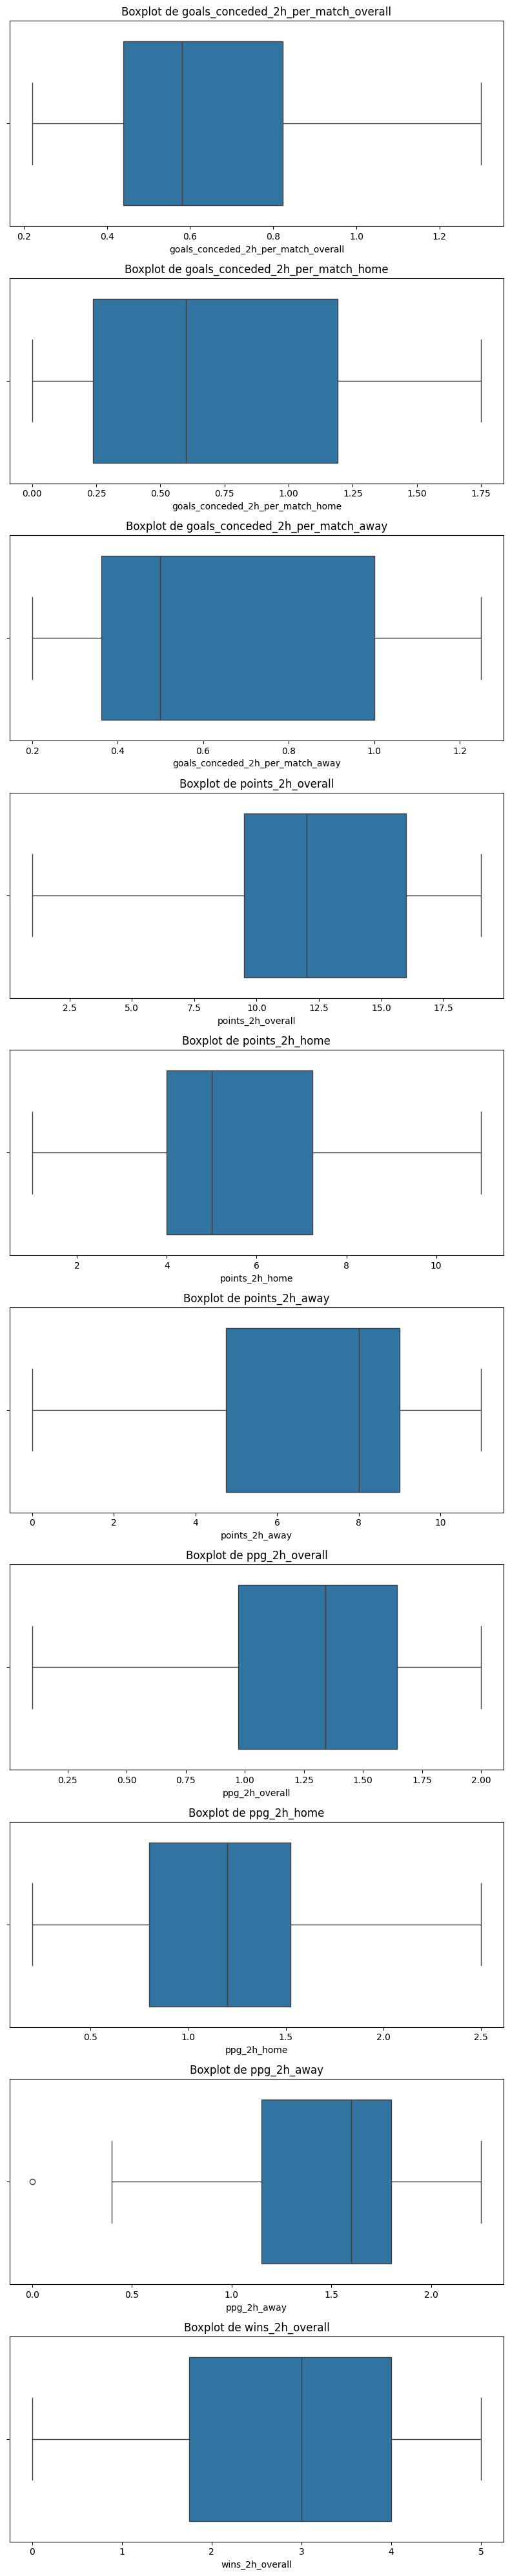

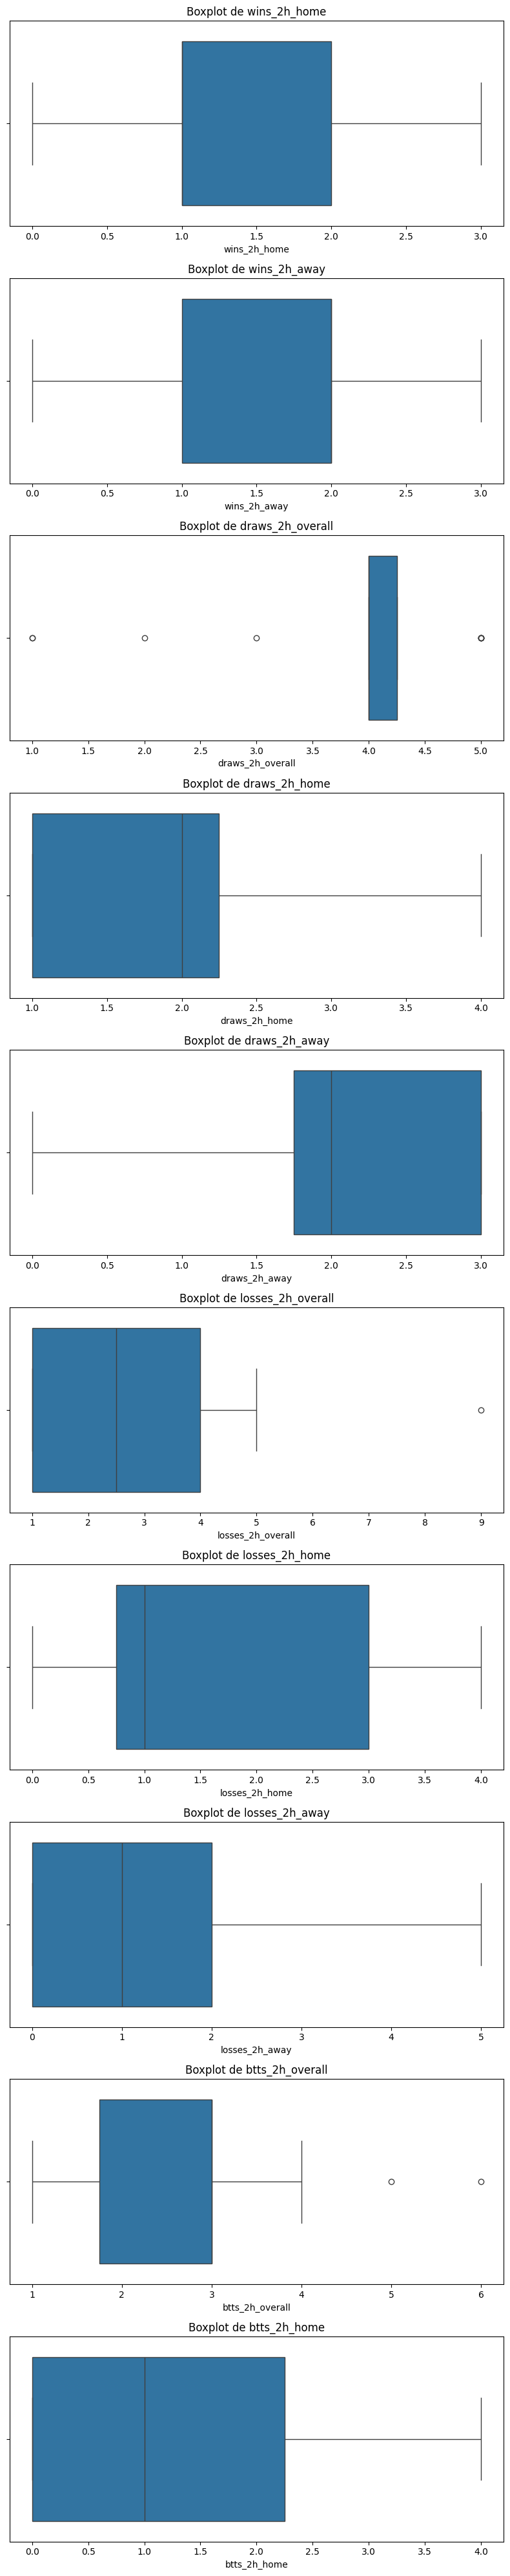

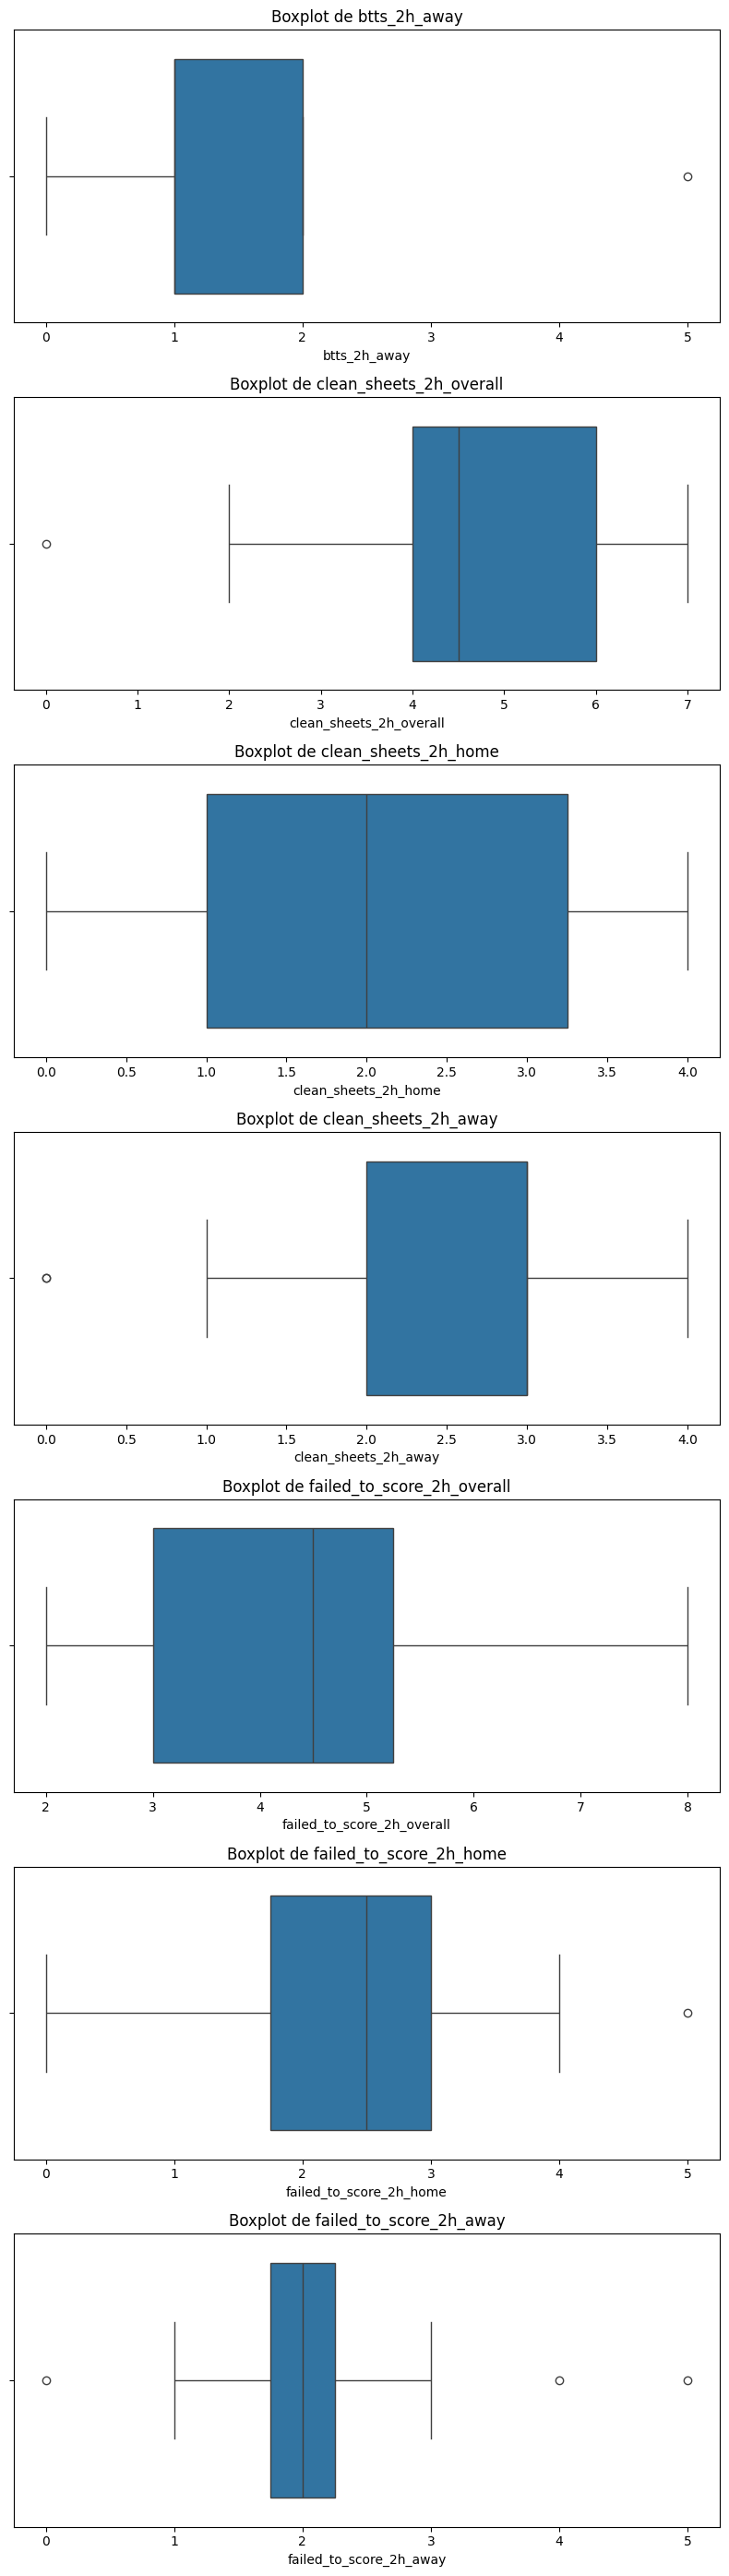

In [5]:
def plot_boxplots_with_outliers(dados, max_plots_per_fig=10):
    # filtrar colunas numéricas dos dados
    numeric_cols = dados.select_dtypes(include=['number']).columns
    # caso não tenha (para evitar erros)
    if len(numeric_cols) == 0:
        raise ValueError("Nenhuma coluna numérica no DataFrame.")
    # número de figuras necessárias pra plotar as colunas
    num_figures = math.ceil(len(numeric_cols) / max_plots_per_fig)
    for fig_idx in range(num_figures):
        start_idx = fig_idx * max_plots_per_fig
        end_idx = start_idx + max_plots_per_fig
        cols_to_plot = numeric_cols[start_idx:end_idx]
        fig, axes = plt.subplots(nrows=len(cols_to_plot), ncols=1, figsize=(8, len(cols_to_plot) * 4))
        # se tiver só uma (como no caso da tabela de league, que o parceiro dispobibilizou) não gera lista
        if len(cols_to_plot) == 1:
            axes = [axes]
        for ax, col in zip(axes, cols_to_plot):
            try:
                sns.boxplot(x=dados[col], ax=ax)
                ax.set_title(f'Boxplot de {col}')
                ax.set_xlabel(col)
            except ValueError as e:
                print(f"Erro ao criar boxplot para a coluna '{col}': {e}")
        plt.tight_layout()
        plt.show()
# informações para diagnóst ico
print(dados.info())
# primeiras colunas do dataframe para ter certeza que foi carregado corretamente
print(dados.head())
plot_boxplots_with_outliers(dados)

## 1.3.1 Quantidade de outliers por coluna

Após a identificação visual dos outliers utilizando boxplots, é importante quantificar esses outliers em cada coluna numérica. A quantificação dos outliers nos dá uma visão mais clara da extensão dos valores atípicos em nosso dataset, permitindo decisões informadas sobre como lidar com eles. Com isso garantindo a integridade dos modelos preditivos, já que um grande número de outliers pode distorcer os resultados e influenciar negativamente o desempenho dos algoritmos.

Nesta subseção, foi utilizado o método do Intervalo Interquartil (IQR) para identificar e contar a quantidade de outliers presentes em cada coluna numérica do dataset.

In [6]:
for column in dados.select_dtypes(include=['number']).columns:
    def identificar_outliers_iqr(coluna):
      Q1 = coluna.quantile(0.25)
      Q3 = coluna.quantile(0.75)
      IQR = Q3 - Q1
      limite_inferior = Q1 - 1.5 * IQR
      limite_superior = Q3 + 1.5 * IQR
      return (coluna < limite_inferior) | (coluna > limite_superior)

# Aplicar a função apenas nas colunas numéricas
outliers = dados.select_dtypes(include=[np.number]).apply(identificar_outliers_iqr)

# Contar a quantidade de outliers por coluna
quantidade_outliers = outliers.sum()

# Imprimir o resultado
print(quantidade_outliers)


minutes_per_goal_scored_overall      0
minutes_per_goal_scored_home         1
minutes_per_goal_scored_away         0
minutes_per_goal_conceded_overall    1
minutes_per_goal_conceded_home       1
                                    ..
clean_sheets_2h_home                 0
clean_sheets_2h_away                 2
failed_to_score_2h_overall           0
failed_to_score_2h_home              1
failed_to_score_2h_away              3
Length: 137, dtype: int64


## 1.4 Tratamento de outliers

Para reduzir o impacto desses outliers, foi utilizado uma técnica chamada **Winsorização**. A Winsorização ajusta os valores dos outliers para que fiquem dentro de limites especificados, permitindo que os dados extremos sejam mantidos, mas com menos influência nas análises.

A Winsorização é utilizada para reduzir a influência de outliers nos dados sem removê-los, substituindo os valores fora de um certo limite por valores próximos ao limite. Isso preserva a integridade dos dados enquanto minimiza o impacto dos outliers extremos.

In [7]:
# Função para aplicar Winsorização
def aplicar_winsorizacao(coluna, limite_inferior=0.05, limite_superior=0.05):
    return winsorize(coluna, limits=(limite_inferior, limite_superior))

# Aplicar a Winsorização nas colunas numéricas
dados_winsorizado = dados.select_dtypes(include=[np.number]).apply(aplicar_winsorizacao)

# Substituir as colunas originais pelas winsorizadas
dados[dados_winsorizado.columns] = dados_winsorizado

# Verificação dos resultados
print("Valores mínimos e máximos depois da Winsorização:")
print(dados_winsorizado.min())
print(dados_winsorizado.max())

dados.head()

Valores mínimos e máximos depois da Winsorização:
minutes_per_goal_scored_overall      51.0
minutes_per_goal_scored_home         45.0
minutes_per_goal_scored_away         45.0
minutes_per_goal_conceded_overall    48.0
minutes_per_goal_conceded_home       38.0
                                     ... 
clean_sheets_2h_home                  0.0
clean_sheets_2h_away                  0.0
failed_to_score_2h_overall            2.0
failed_to_score_2h_home               1.0
failed_to_score_2h_away               1.0
Length: 137, dtype: float64
minutes_per_goal_scored_overall      129.0
minutes_per_goal_scored_home         113.0
minutes_per_goal_scored_away         225.0
minutes_per_goal_conceded_overall    143.0
minutes_per_goal_conceded_home       225.0
                                     ...  
clean_sheets_2h_home                   4.0
clean_sheets_2h_away                   4.0
failed_to_score_2h_overall             8.0
failed_to_score_2h_home                4.0
failed_to_score_2h_away       

,common_name,minutes_per_goal_scored_overall,minutes_per_goal_scored_home,minutes_per_goal_scored_away,minutes_per_goal_conceded_overall,minutes_per_goal_conceded_home,minutes_per_goal_conceded_away,highest_goals_scored_home,highest_goals_scored_away,highest_goals_conceded_home,...,losses_2h_away,btts_2h_overall,btts_2h_home,btts_2h_away,clean_sheets_2h_overall,clean_sheets_2h_home,clean_sheets_2h_away,failed_to_score_2h_overall,failed_to_score_2h_home,failed_to_score_2h_away
0,Vitória,75,60,120,53,49,60,4,1,3,...,2,5,3,2,3,1,2,4,2,2
1,Flamengo,51,60,45,101,90,113,2,5,2,...,0,4,2,2,4,1,3,2,1,1
2,Cruzeiro,68,45,225,81,90,75,3,1,2,...,1,3,3,0,5,1,4,3,1,3
3,Botafogo,53,50,56,100,113,90,5,2,2,...,1,4,3,1,6,2,4,2,1,1
4,Grêmio,120,90,180,72,90,60,2,1,2,...,0,1,0,1,5,2,3,5,3,2


## 1.5 Codificação de variáveis categóricas

Nessa etapa foi feito a transformação das variáveis categóricas para um formato numérico que possa ser interpretado pelos algoritmos de aprendizado de máquina. Para este propósito, foi utilizado a técnica de codificação através do `LabelEncoder`, que converte categorias em valores inteiros, facilitando sua utilização nos modelos.

#### Variáveis Categóricas Codificadas

No dataset, os nomes dos times de futebol são variáveis categóricas que precisam ser convertidas em formato numérico. Isso permitirá que os modelos interpretem as equipes como entradas válidas durante o processo de treinamento.

In [8]:
# Inicializando o LabelEncoder
label_encoder = LabelEncoder()

# Codificando os nomes dos times
dados['common_name_encoded'] = label_encoder.fit_transform(dados['common_name'])



# Ordenando as colunas codificadas em ordem crescente
dados = dados.sort_values(by=['common_name_encoded']).reset_index(drop=True)

dados.head(10)

C:\Users\Inteli\AppData\Local\Temp\ipykernel_26436\989189666.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dados['common_name_encoded'] = label_encoder.fit_transform(dados['common_name'])


,common_name,minutes_per_goal_scored_overall,minutes_per_goal_scored_home,minutes_per_goal_scored_away,minutes_per_goal_conceded_overall,minutes_per_goal_conceded_home,minutes_per_goal_conceded_away,highest_goals_scored_home,highest_goals_scored_away,highest_goals_conceded_home,...,btts_2h_overall,btts_2h_home,btts_2h_away,clean_sheets_2h_overall,clean_sheets_2h_home,clean_sheets_2h_away,failed_to_score_2h_overall,failed_to_score_2h_home,failed_to_score_2h_away,common_name_encoded
0,Atlético GO,100,113,90,64,45,113,2,2,3,...,3,2,1,4,0,4,5,3,2,0
1,Atlético Mineiro,58,72,50,63,60,64,3,3,4,...,3,1,2,4,1,3,5,3,2,1
2,Atlético PR,64,45,113,129,225,90,4,2,1,...,2,1,1,7,4,3,3,1,2,2
3,Bahia,63,72,56,90,225,56,2,2,1,...,5,0,2,4,4,0,2,2,1,3
4,Botafogo,53,50,56,100,113,90,5,2,2,...,4,3,1,6,2,4,2,1,1,4
5,Bragantino,68,64,72,90,90,90,2,2,2,...,2,1,1,6,3,3,5,3,2,5
6,Corinthians,129,90,225,82,150,56,3,2,2,...,1,0,1,6,4,2,8,4,4,6
7,Criciúma,51,60,45,48,38,72,2,4,5,...,3,3,0,3,0,3,2,1,1,7
8,Cruzeiro,68,45,225,81,90,75,3,1,2,...,3,3,0,5,1,4,3,1,3,8
9,Cuiabá,75,90,64,60,75,50,5,5,3,...,2,0,2,4,2,2,6,4,2,9


In [9]:
# Criar um DataFrame com os nomes dos times e seus IDs codificados
team_mapping = pd.DataFrame({
    'common_name': label_encoder.classes_,  # Nomes dos times originais
    'common_name_encoded': range(len(label_encoder.classes_))  # IDs codificados
})

# Exibir o mapeamento
print(team_mapping)


         common_name  common_name_encoded
0        Atlético GO                    0
1   Atlético Mineiro                    1
2        Atlético PR                    2
3              Bahia                    3
4           Botafogo                    4
5         Bragantino                    5
6        Corinthians                    6
7           Criciúma                    7
8           Cruzeiro                    8
9             Cuiabá                    9
10          Flamengo                   10
11        Fluminense                   11
12         Fortaleza                   12
13            Grêmio                   13
14     Internacional                   14
15         Juventude                   15
16         Palmeiras                   16
17         São Paulo                   17
18     Vasco da Gama                   18
19           Vitória                   19


## 1.6 Normalização dos Dados com Z-Score

Nesta célula, estamos aplicando a técnica de normalização Z-Score aos dados do dataset. A normalização Z-Score transforma os dados de forma que cada feature tenha uma média de 0 e um desvio padrão de 1, o que é útil para algoritmos de machine learning que são sensíveis à escala dos dados, como modelos baseados em gradientes e distância.


**Benefícios**:
* Consistência: A normalização Z-Score padroniza os dados, o que pode melhorar o desempenho de algoritmos de aprendizado de máquina que se beneficiam de features na mesma escala.
* Preservação dos rótulos: Ao converter os dados normalizados de volta para um DataFrame, os rótulos das colunas são preservados, facilitando a interpretação dos resultados.

In [10]:


dados.head()

,common_name,minutes_per_goal_scored_overall,minutes_per_goal_scored_home,minutes_per_goal_scored_away,minutes_per_goal_conceded_overall,minutes_per_goal_conceded_home,minutes_per_goal_conceded_away,highest_goals_scored_home,highest_goals_scored_away,highest_goals_conceded_home,...,btts_2h_overall,btts_2h_home,btts_2h_away,clean_sheets_2h_overall,clean_sheets_2h_home,clean_sheets_2h_away,failed_to_score_2h_overall,failed_to_score_2h_home,failed_to_score_2h_away,common_name_encoded
0,Atlético GO,100,113,90,64,45,113,2,2,3,...,3,2,1,4,0,4,5,3,2,0
1,Atlético Mineiro,58,72,50,63,60,64,3,3,4,...,3,1,2,4,1,3,5,3,2,1
2,Atlético PR,64,45,113,129,225,90,4,2,1,...,2,1,1,7,4,3,3,1,2,2
3,Bahia,63,72,56,90,225,56,2,2,1,...,5,0,2,4,4,0,2,2,1,3
4,Botafogo,53,50,56,100,113,90,5,2,2,...,4,3,1,6,2,4,2,1,1,4


## 1.7 Exportação

Aqui exportamos o dataframe tratado para unir ele à tabela teams2, que também foi tratada, no arquivo ```teams_predicao.csv```, já que esses arquivos tem informações que podem ser consideradas complementares, então, para predição das informações que queremos nesse projeto, é melhor trabalharmos com todos os dados juntos

In [11]:
dados.to_csv('../../notebooks/data/tratado/teams2_tratado.csv', index=False) 

## 2 Referências

Está é uma seção de referências com relação as bibliotecas que utilizamos ao longo deste arquivo

NUMPY. NumPy Documentation. Disponível em: <https://numpy.org/doc/>.

‌PANDAS. pandas documentation. Disponível em: <https://pandas.pydata.org/docs/>.

MATPLOTLIB. Matplotlib: Python plotting — Matplotlib 3.3.4 documentation. Disponível em: <https://matplotlib.org/stable/index.html>.

‌SEABORN. seaborn: statistical data visualization — seaborn 0.9.0 documentation. Disponível em: <https://seaborn.pydata.org/>.

‌SciPy documentation — SciPy v1.8.1 Manual. Disponível em: <https://docs.scipy.org/doc/scipy/>.

‌PYTHON SOFTWARE FOUNDATION. Math — Mathematical Functions — Python 3.8.3rc1 Documentation. Disponível em: <https://docs.python.org/3/library/math.html>.

‌SCIKIT-LEARN. scikit-learn: machine learning in Python. Disponível em: <https://scikit-learn.org/stable/>.